## Data Exploration & Preprocessing

### Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

In [23]:
# Import libraries for data manipulation
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [2]:
# Load Data
data = pd.read_csv('/workspaces/Predicting-Potential-Customers/ExtraaLearn.csv')

# Overview
data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [3]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

In [4]:
# Understand the shape of the data
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns present in the data.')

There are 4612 rows and 15 columns present in the data.


In [5]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**
- The 'non-null count' for all columns is 4612, which matches the total number of entries. This indicates there are no missing values in the dataset.
- The first column, `ID`, is a unique identifier for each entry and is of type object. This column will not help with our analysis so we can drop it.
- Numeric columns (age, website_visits, time_spent_on_website, page_views_per_visit, status) are correctly stored as int64 or float64.
- Conversion Status: Binary (0/1) as expected.

In [6]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [7]:
# Check for duplicate IDs
duplicate_ids = data['ID'].duplicated().sum()
print(f"Number of duplicate IDs: {duplicate_ids}")

Number of duplicate IDs: 0


**Observation**: 
- Data contains unique rows. There is no need to remove any rows so far.

In [8]:
# Checking the descriptive statistics of the columns
print("\nBasic statistics:")
data.describe().T


Basic statistics:


,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations**:
- The **average age** of leads is 46.2 years, with a median of 51 years, indicating a mature audience.
- Age ranges from 18 to 63 years, suggesting a **diverse target demographic**.
- The **average number of website visits** per lead is 3.57, with a median of 3 visits.
- Some users visited the **website zero** times, meaning they didn't visit the website at all.
- A significant number of leads (25%) have only 2 or fewer visits, while some highly engaged leads have up to 30 visits
- The **average time spent on the website** is approximately 724 units (likely seconds), with a median of 376 secs.
- There is considerable variability, with some leads spending as little as 0 seconds and others spending up to 2,537 seconds.
- Leads view an average of about 3.03 pages per visit, with a median of approximately 2.79 pages.
- Approximately 29.86% of leads convert to paid customers, indicating a relatively good conversion rate but also potential for improvement.

Categorical Consistency: **current_occupation**, **first_interaction**, **profile_completed**, and **last_activity** show expected categories. 

We would also need to perform **encoding techniques** to make them suitable for machine learning models.

In [9]:
# Categorical Columns
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Printing the number of occurrences of each unique value in each categorical column
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*35)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
***********************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
***********************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
***********************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
***********************************


**Observations**:
- More than half of the leads are **professionals**, which aligns with the age distribution we saw earlier (mostly middle-aged).
- There's a fairly even split between **website and mobile app** as the first point of interaction.
- The vast majority of leads (97.68%) have at least a **medium level of profile completion**.
- Very few leads have low profile completion.
- **Email activity is the most common last interaction**, suggesting it plays a crucial role in the later stages of the lead journey.

#### **Other columns**

In [10]:
binary_cols = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
# Printing the % sub categories of each category
for i in binary_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dtype: float64
****************************************
referral
No     0.979835
Yes    0.020165
Name: proportion, dtype: float64
****************************************


**Observations**:
- **Educational channels** are the most effective among these marketing methods, reaching 15.29% of leads.
- **Digital media** (11.43%) and **newspaper ads** (10.78%) have similar reach, both performing better than **magazine ads** (5.05%).
- The **referral program** appears to be the least effective, reaching only 2.02% of leads.
- Overall, these **marketing channels** are reaching a relatively small portion of the total lead pool, suggesting there may be other significant sources of leads not captured in these variables.

---

### **Univariate Analysis**

#### Distribution of Target Variable: Status (Conversion)

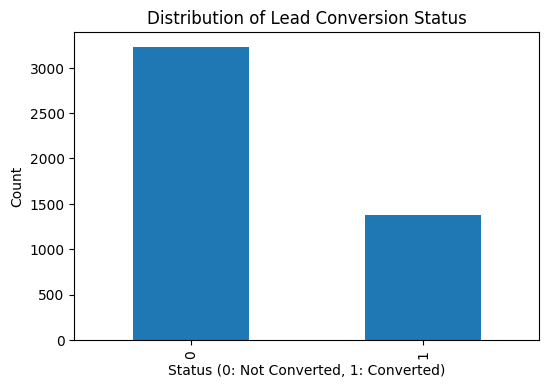

Overall conversion rate: 29.86%


In [11]:
plt.figure(figsize=(6, 4))
data['status'].value_counts().plot(kind='bar')
plt.title('Distribution of Lead Conversion Status')
plt.xlabel('Status (0: Not Converted, 1: Converted)')
plt.ylabel('Count')
plt.show()

conversion_rate = data['status'].mean() * 100
print(f"Overall conversion rate: {conversion_rate:.2f}%")

**Observation**:
- The dataset appears to be imbalanced, with more non-converted leads than converted ones.
- About 30% of leads convert to customers, which is a significant conversion rate for many industries.

---

### **Distribution of Numerical Variables**

In [12]:
def histogram_boxplot(data, feature, figsize=(8, 6), kde=False, bins=None):
    """
    Create a combined boxplot and histogram for a given feature.

    Parameters:
    data (DataFrame): Input dataframe
    feature (str): Column name to visualize
    figsize (tuple): Figure size (default: (8,6))
    kde (bool): Show density curve (default: False)
    bins (int): Number of histogram bins (default: None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, 
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )
    
    # Create boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    
    # Create histogram
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,color='skyblue')
    
    # Add mean and median lines to histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

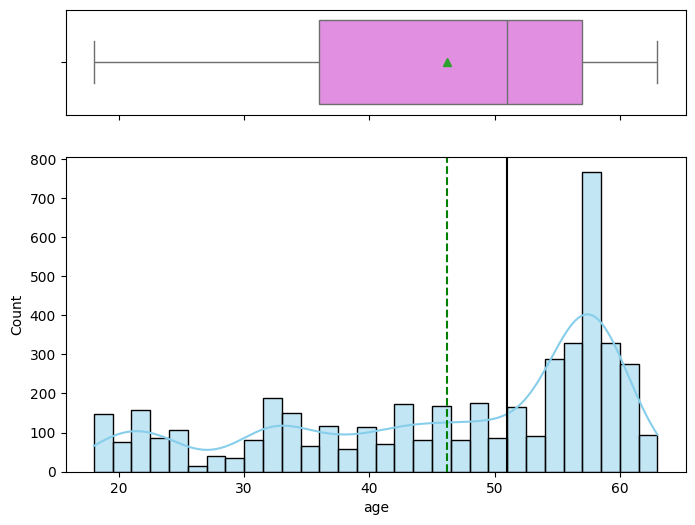

In [13]:
# Age distribution
histogram_boxplot(data, "age", kde = True, bins = 30)

**Observations**:
- The age distribution is **sligthly left-skewed**.
- Most leads fall between 36 and 57 years old, but we have representation from both younger and older learners. 
- There's a slight skew towards older leads.
- We have a larger group of older leads and a smaller tail of younger leads.

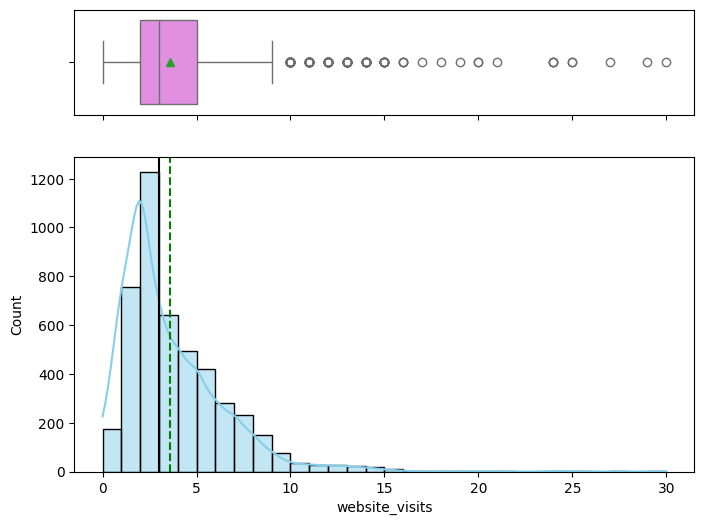

In [14]:
# Website Visits Distribution

histogram_boxplot(data, "website_visits", kde = True, bins = 30)

**Observations**:
- **Most leads visit the website a few times**, with the average being around 3-4 visits.
- **Website visits above 10 are considered outliers** (represented by individual points in the boxplot). These outliers represent leads with unusually high engagement levels.
- **The histogram shows a right-skewed** (positively skewed) distribution.

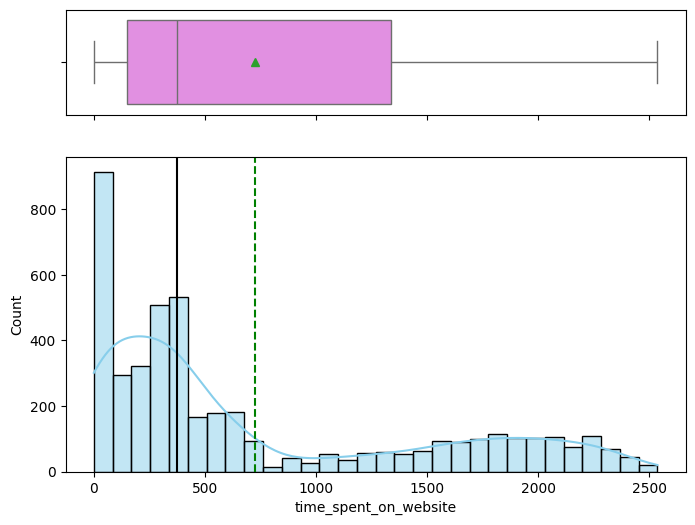

In [15]:
# TIme Spent on Website Distribution
histogram_boxplot(data, "time_spent_on_website", kde = True, bins = 30)

**Observation**:
- Some users spent **zero** time on the website, indicating they either didn't interact with the website at all, or their session was recorded as having no time spent.
- The user who spent the most time on the website spent over 2500 seconds, which is approximately 42 minutes in total.

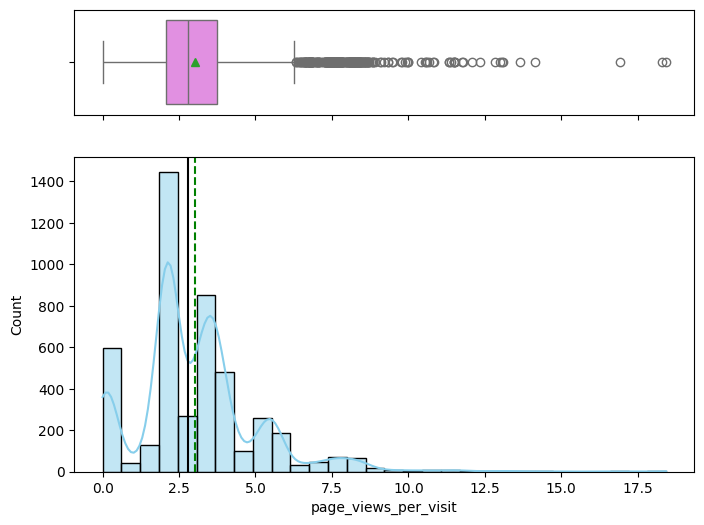

In [16]:
# Page Views per Visit Distributions
histogram_boxplot(data, "page_views_per_visit", kde = True, bins = 30)

**Observations**:
- On average, l**eads view about 3 pages per visit**.
- Some users **viewed 0 pages** during their visit. This could mean that although a session was recorded (i.e., they visited the website), they didn't engage by viewing any pages. This could happen if a user opened the site but immediately left without interacting with it, a scenario often referred to as a "bounce".

---
 ### **Distribution of Categorical Variables**

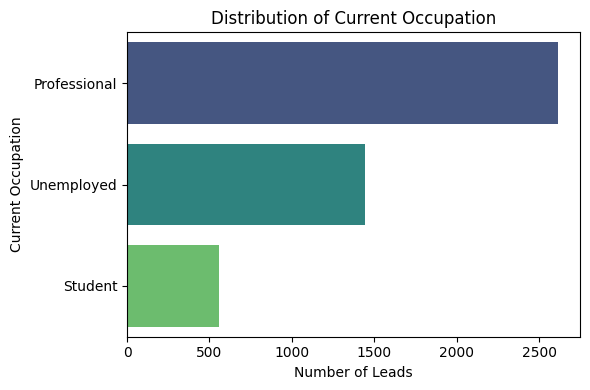


Distribution of current_occupation:
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64

The dataset includes 3 unique current occupation types.
--------------------


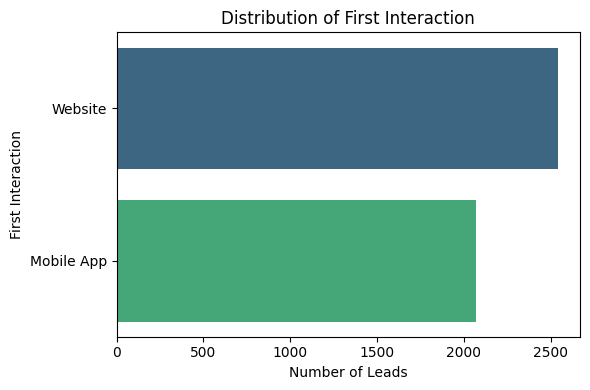


Distribution of first_interaction:
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64

The dataset includes 2 unique first interaction types.
--------------------


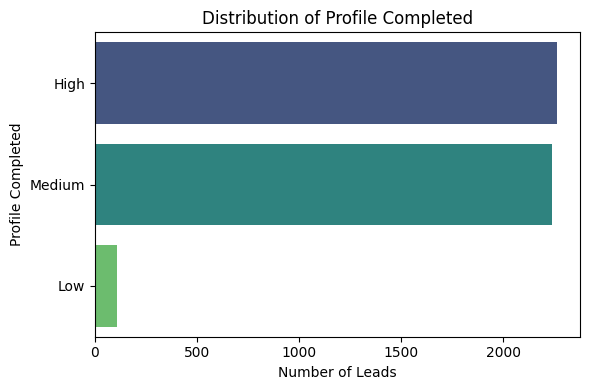


Distribution of profile_completed:
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64

The dataset includes 3 unique profile completed types.
--------------------


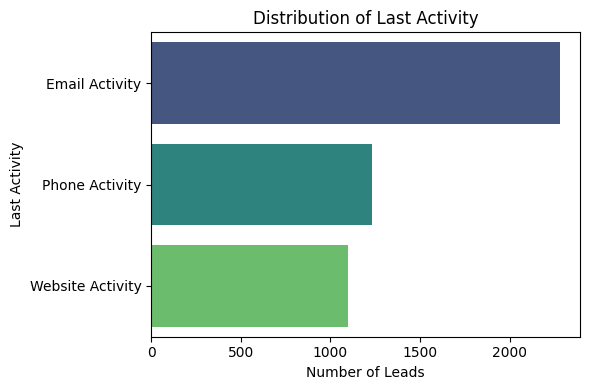


Distribution of last_activity:
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64

The dataset includes 3 unique last activity types.
--------------------


In [17]:
for column in cat_cols:
    # Count values
    value_counts = data[column].value_counts()
    
    # Create plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x=value_counts.values, y=value_counts.index, 
                hue=value_counts.index, palette='viridis')
    
    plt.title(f'Distribution of {column.replace("_", " ").title()}')
    plt.xlabel('Number of Leads')
    plt.ylabel(column.replace("_", " ").title())
    plt.tight_layout()
    plt.show()
    
    print(f"\nDistribution of {column}:")
    print(value_counts)
    print(f"\nThe dataset includes {data[column].nunique()} unique {column.replace('_', ' ')} types.")
    print("--------------------")

**Observations**:
- **Professionals form the majority of leads**, suggesting ExtraaLearn's offerings may be attractive for career advancement.
- A **significant portion of unemployed leads indicates potential interest** in skill acquisition for job seeking.
- Students represent the smallest group, possibly due to budget constraints or different educational priorities.

- **The website is slightly more popular for first interactions**, but the mobile app is also significant.
- This suggests a good balance between desktop and mobile users.
- **Most users complete their profiles to a high or medium degree**, which is positive.
- **Email is the most common last activity**, suggesting it's an important touchpoint.
- **Phone and website activities** are also significant, indicating a multi-channel approach is being used.

---

### **Bivariate and Multivariate analysis**

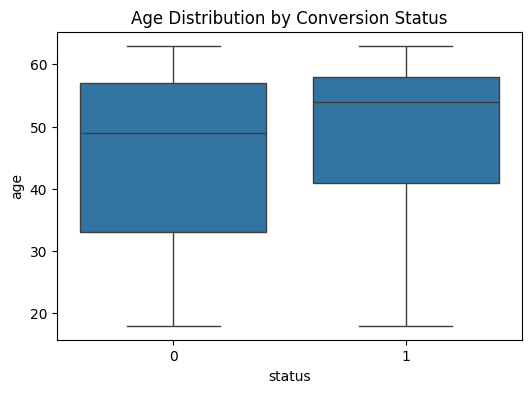

In [18]:
# Age vs Conversion
plt.figure(figsize=(6, 4))
sns.boxplot(x='status', y='age', data=data)
plt.title('Age Distribution by Conversion Status')
plt.show()

**Observations**:
- The **median age for converted leads** (status=1) appears to be higher than for non-converted leads (status=0). This suggests that **older leads are indeed more likely to convert**.
- The interquartile range (box size) seems smaller for converted leads, indicating less variability in age for this group.
- **Non-converted leads have a wider age range**, suggesting they come from a more diverse age group.

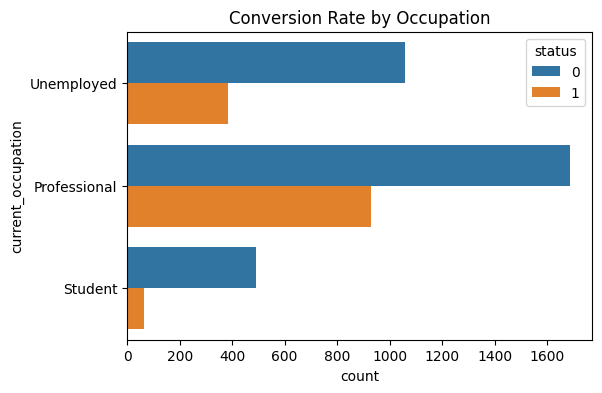

In [19]:
# Occupation vs Conversion
plt.figure(figsize=(6, 4))
sns.countplot(y='current_occupation', hue='status', data=data)
plt.title('Conversion Rate by Occupation')
plt.show()

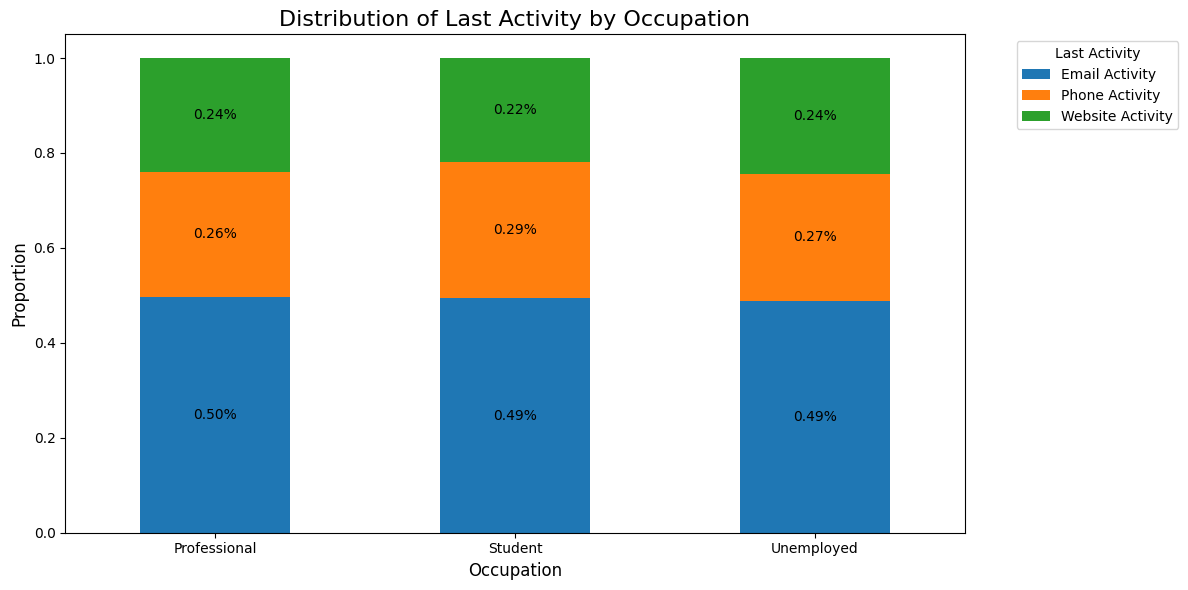

In [20]:
# Relationship between occupation and last activity
cross_tab = pd.crosstab(data['current_occupation'], data['last_activity'], normalize='index')

ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribution of Last Activity by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Last Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f%%', label_type='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

**Observations**:
- The **overall pattern of last activities is remarkably similar across all occupations**.
- **Email is the predominant last activity** for all groups.
- Students show a slightly higher preference for phone activities and lower website activities compared to other groups.

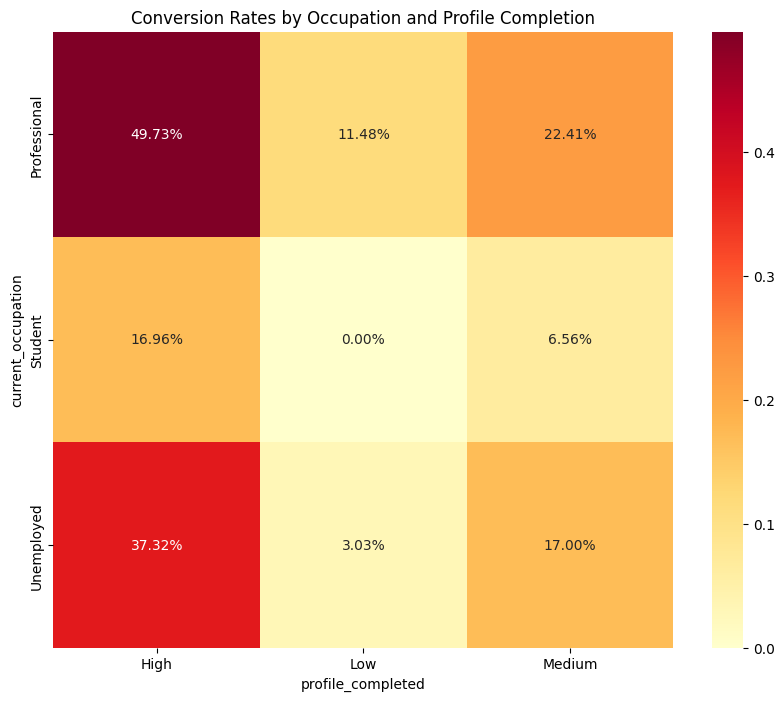

In [21]:
# Conversion Rates by Occupation and Profile Completion
heatmap_data = pd.crosstab([data['current_occupation'], data['profile_completed']], data['status'], normalize='index')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data[1].unstack(), annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Conversion Rates by Occupation and Profile Completion')
plt.show()

**Observations**:
- Across all occupations, **higher profile completion correlates with higher conversion rates**. The impact is most pronounced for **Professionals** and **Unemployed** individuals.
- **Professionals** have the highest conversion rates across all profile completion levels. Students show the lowest conversion rates, regardless of profile completion.

---
#### **Correlation Analysis**

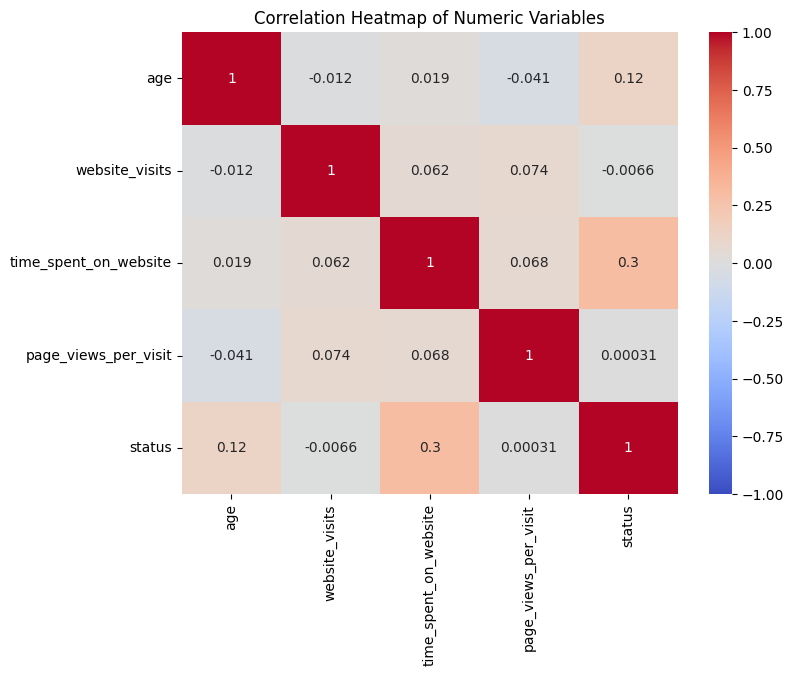

In [22]:
numeric_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

**Observation**:
- The **moderate positive correlation** between **time spent on the website** and **conversion** is the most significant finding.
- While the correlation is weak, **older leads show a slightly higher tendency to convert**.
- The number of website visits doesn't correlate with conversion, suggesting quality of visits matters more than quantity.
- The lack of correlation between page views per visit and conversion suggests that simply encouraging users to view more pages may not be effective.